### Import necesaary libraryies 

In [1]:
from pylab import *
import netCDF4
import numpy as np
import os
os.getcwd()

'C:\\Users\\bantwale.enyew\\python_netcdf\\mvnest_oro'

In [2]:
#!conda  install --yes  pandas

In [3]:
#! conda install --yes -c conda-forge xarray dask netCDF4 bottleneck

In [4]:
import netCDF4 
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import xarray as xr
import matplotlib.image as mgimg
from matplotlib import animation
import glob
import os
%matplotlib inline

## Convert to physical grid resoultion
This program computes the global equivalent resolution for regional grids. For example, a global grid with x/y dimensions of 96 would have a global resolution (CRES) of C96. And the approximate physical resolution would be:

*Res in km = (360 degrees / 4*CRES) * 111 km = 104 km

Using the average cell size (in m^2) of the regional grid, the equivalent global resolution is computed according to:

*CRES = nint( (2*pi*rad_earth)/(4*avg_cell_size) )


In [6]:
def Conv2phyres( cres ):
    
    Rkm=(360/(4*cres))*111
    
    return Rkm

rad_earth=6371200.0
def Con2equ_globres(avg_cell_size):
    
    cres=int((2*(np.pi)*rad_earth)/(4*avg_cell_size*1000))
    cres=str('C')+str(cres)
    return cres

In [23]:
delx=0.057
circumf_Earth=(2*(np.pi)*rad_earth)
res_in_km = (2*delx*(circumf_Earth/360))/1000
res_in_km

12.67661957254915

In [8]:
res_in_km=6
delx=(1000*res_in_km)/(2*(circumf_Earth/360))
delx

0.026978801252393107

In [9]:
(4*930)/110


33.81818181818182

In [10]:
Con2equ_globres(12.00)

'C833'

In [16]:
180/3

60.0

In [17]:
702-180


522

## Coarse resolution

In [14]:
Conv2phyres(4642),Conv2phyres(1547)

(2.152089616544593, 6.457659987071752)

In [15]:
deg = ((Conv2phyres(2338)*930)/111)
deg

35.799828913601374

In [16]:
## fine resolution

In [17]:
Conv2phyres(1547), Conv2phyres(4642)

(6.457659987071752, 2.152089616544593)

### Read or load the netcdf data

In [18]:
# Load data for coarse resolution domain
f = netCDF4.Dataset('C769_oro_data.tile7.halo0.nc', 'r')
# Load data for fine resolution domain

# Load data for coarse resolution domain
fg = netCDF4.Dataset('C769_grid.tile7.halo0.nc', 'r')
for a in f.variables:
  print(a)

geolon
geolat
slmsk
land_frac
orog_raw
orog_filt
stddev
convexity
oa1
oa2
oa3
oa4
ol1
ol2
ol3
ol4
theta
gamma
sigma
elvmax


In [19]:
# Load the second data set for coarse resulution
f2 = netCDF4.Dataset('C2306_oro_data.tile7.halo0.nc', 'r')
f2g = netCDF4.Dataset('C2306_grid.tile7.halo0.nc', 'r')


In [20]:
f2

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): lon(1950), lat(1620)
    variables(dimensions): float32 geolon(lat, lon), float32 geolat(lat, lon), float32 slmsk(lat, lon), float32 land_frac(lat, lon), float32 orog_raw(lat, lon), float32 orog_filt(lat, lon), float32 stddev(lat, lon), float32 convexity(lat, lon), float32 oa1(lat, lon), float32 oa2(lat, lon), float32 oa3(lat, lon), float32 oa4(lat, lon), float32 ol1(lat, lon), float32 ol2(lat, lon), float32 ol3(lat, lon), float32 ol4(lat, lon), float32 theta(lat, lon), float32 gamma(lat, lon), float32 sigma(lat, lon), float32 elvmax(lat, lon)
    groups: 

In [21]:
# Load the second data set for coarse resulution
f3 = netCDF4.Dataset('C769_oro_data.tile8.nc', 'r')


### Checking some paramters if the dataset is okey

In [22]:
lats_fres = f2.variables['geolat'][:,:]
lons_fres = f2.variables['geolon'][:,:]
lats_fres

masked_array(
  data=[[ 45.63372  ,  45.655323 ,  45.67691  , ...,  45.67691  ,
          45.655323 ,  45.63372  ],
        [ 45.6042   ,  45.62579  ,  45.64736  , ...,  45.64736  ,
          45.62579  ,  45.6042   ],
        [ 45.57467  ,  45.596237 ,  45.617794 , ...,  45.617794 ,
          45.596237 ,  45.57467  ],
        ...,
        [-10.019709 , -10.014005 , -10.0083065, ..., -10.0083065,
         -10.014005 , -10.019709 ],
        [-10.057731 , -10.052032 , -10.046341 , ..., -10.046341 ,
         -10.052032 , -10.057731 ],
        [-10.095758 , -10.090067 , -10.084382 , ..., -10.084382 ,
         -10.090067 , -10.095758 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [23]:
lats_fres_nst = f3.variables['geolat'][:,:]
lons_fres_nst = f3.variables['geolon'][:,:]
lats_fres_nst

masked_array(
  data=[[34.147137 , 34.153893 , 34.160633 , ..., 35.284676 , 35.281384 ,
         35.278076 ],
        [34.1089   , 34.115646 , 34.122383 , ..., 35.245422 , 35.242134 ,
         35.23883  ],
        [34.07066  , 34.077404 , 34.08413  , ..., 35.206173 , 35.20289  ,
         35.199585 ],
        ...,
        [ 9.406505 ,  9.410377 ,  9.41424  , ..., 10.054743 , 10.052878 ,
         10.051004 ],
        [ 9.36753  ,  9.371398 ,  9.3752575, ..., 10.015174 , 10.013311 ,
         10.011439 ],
        [ 9.328552 ,  9.3324175,  9.336273 , ...,  9.975604 ,  9.9737425,
          9.971872 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [24]:
lats_fres[0][649]

55.894867

In [25]:
lats_fres[1].shape

(1950,)

In [26]:
lons_fres[1].shape

(1950,)

In [27]:
lats_fres[4].shape

(1950,)

In [28]:
lats1d = f.variables['geolat'][1]
lats1d.shape

(650,)

In [29]:
f2.variables['geolat'][0::3][0].shape


(1950,)

In [30]:
f.variables['geolat'].shape

(540, 650)

In [31]:
np.min(f.variables['geolat']),np.max(f.variables['geolat'])

(-10.052032, 57.31893)

In [32]:
np.min(f.variables['geolon']),np.max(f.variables['geolon'])

(240.129, 355.871)

In [33]:
np.min(f2.variables['geolat']),np.max(f2.variables['geolat'])

(-10.095758, 57.360195)

In [34]:
np.min(f2.variables['geolon']),np.max(f2.variables['geolon'])


(240.04707, 355.9529)

In [35]:
np.min(f3.variables['geolat']),np.max(f3.variables['geolat'])

(9.328552, 35.62767)

In [36]:
np.min(f3.variables['geolon']),np.max(f3.variables['geolon'])

(287.95767, 318.62085)

In [37]:
np.min(f2.variables['geolat']),np.max(f2.variables['geolat'])

(-10.095758, 57.360195)

In [38]:
np.min(f2.variables['geolon']),np.max(f2.variables['geolon'])

(240.04707, 355.9529)

In [39]:
latbnd= [np.min(f3.variables['geolat']),np.max(f3.variables['geolat'])]
lonbnd = [np.min(f3.variables['geolon']),np.max(f3.variables['geolon'])]

In [40]:
# Extract lat lon of fine grid resolution domain every other three 
# gridpoint to match with the parent domain (3:1 ratio)
lats_fres = f2.variables['geolat'][:,:][0::3,0::3]
lons_fres = f2.variables['geolon'][:,:][0::3,0::3]
lats_fres

masked_array(
  data=[[ 45.63372  ,  45.698486 ,  45.76312  , ...,  45.806133 ,
          45.74159  ,  45.67691  ],
        [ 45.54512  ,  45.60974  ,  45.67423  , ...,  45.717144 ,
          45.65275  ,  45.588215 ],
        [ 45.456406 ,  45.520878 ,  45.585217 , ...,  45.628033 ,
          45.563786 ,  45.4994   ],
        ...,
        [ -9.7916975,  -9.774485 ,  -9.757329 , ...,  -9.745923 ,
          -9.7630415,  -9.780216 ],
        [ -9.905678 ,  -9.888524 ,  -9.871427 , ...,  -9.86006  ,
          -9.87712  ,  -9.894236 ],
        [-10.019709 , -10.002614 ,  -9.985576 , ...,  -9.974248 ,
          -9.991249 , -10.0083065]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [41]:
lats_fres_nst = f3.variables['geolat'][:,:][0::3,0::3]
lons_fres_nst = f3.variables['geolon'][:,:][0::3,0::3]
lats_fres_nst

masked_array(
  data=[[34.147137 , 34.16736  , 34.18744  , ..., 35.297688 , 35.287952 ,
         35.278076 ],
        [34.03242  , 34.052586 , 34.072617 , ..., 35.1799   , 35.170193 ,
         35.160343 ],
        [33.9177   , 33.937817 , 33.957794 , ..., 35.062122 , 35.05244  ,
         35.042618 ],
        ...,
        [ 9.56238  ,  9.574011 ,  9.585562 , ..., 10.220392 , 10.214858 ,
         10.209244 ],
        [ 9.4454775,  9.457077 ,  9.468596 , ..., 10.101686 , 10.096167 ,
         10.090568 ],
        [ 9.328552 ,  9.34012  ,  9.351608 , ...,  9.98296  ,  9.977456 ,
          9.971872 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [42]:
lats_fres.shape

(540, 650)

In [43]:
lons_fres

masked_array(
  data=[[355.9529 , 355.81012, 355.6671 , ..., 240.42833, 240.2852 ,
         240.14227],
        [355.85007, 355.70728, 355.56427, ..., 240.53116, 240.38803,
         240.2451 ],
        [355.7477 , 355.60492, 355.46194, ..., 240.6335 , 240.49039,
         240.34746],
        ...,
        [335.0256 , 334.90604, 334.7865 , ..., 261.29318, 261.17368,
         261.0541 ],
        [335.02112, 334.90152, 334.78198, ..., 261.29767, 261.17816,
         261.05862],
        [335.01672, 334.89713, 334.7776 , ..., 261.30206, 261.18256,
         261.06302]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [44]:
lats_fcrs = f.variables['geolat'][:,:]
lons_fcrs = f.variables['geolon'][:,:]
lons_fcrs

masked_array(
  data=[[355.871  , 355.72812, 355.58505, ..., 240.41493, 240.27187,
         240.129  ],
        [355.7683 , 355.62546, 355.4824 , ..., 240.5176 , 240.37454,
         240.23167],
        [355.66614, 355.52325, 355.38022, ..., 240.61978, 240.47673,
         240.33388],
        ...,
        [334.98425, 334.86465, 334.74515, ..., 261.25485, 261.13535,
         261.01575],
        [334.97977, 334.8602 , 334.7407 , ..., 261.2593 , 261.1398 ,
         261.02023],
        [334.97543, 334.85583, 334.73633, ..., 261.26367, 261.14417,
         261.02457]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [45]:

#!/ usr/bin/env python
minLat =latbnd[0] #min(lat)
maxLat =latbnd[1] #max(lat)
minLon =lonbnd[0] #min(lon)
maxLon =lonbnd[0] #max(lon)
def sliceLatLonBox( lat , lon, minLat , maxLat , minLon , maxLon ):
    indexLat =  np.where((lat >= latbnd[0]) &  
                         (lat <= latbnd[1]) & 
                         (lon >= lonbnd[0]) & 
                         (lon <= lonbnd[1]))
    indexLon =  np.where((lat >= latbnd[0]) & 
                         (lat <= latbnd[1]) & 
                         (lon >= lonbnd[0]) & 
                         (lon <= lonbnd[1]))
    return indexLat , indexLon

### Fine resolution domain

In [46]:
sliceLatLonBox(lats_fres,lons_fres,minLat,maxLat,minLon,maxLon)

((array([168, 168, 168, ..., 402, 402, 402]),
  array([183, 184, 185, ..., 334, 335, 336])),
 (array([168, 168, 168, ..., 402, 402, 402]),
  array([183, 184, 185, ..., 334, 335, 336])))

### Coarse resolution domain

In [47]:
sliceLatLonBox(lats_fcrs,lons_fcrs,minLat,maxLat,minLon,maxLon)

((array([168, 168, 168, ..., 401, 401, 401]),
  array([182, 183, 184, ..., 368, 369, 370])),
 (array([168, 168, 168, ..., 401, 401, 401]),
  array([182, 183, 184, ..., 368, 369, 370])))

In [48]:
lats_fres[sliceLatLonBox(lats_fres,lons_fres,minLat,maxLat,minLon,maxLon)]


masked_array(
  data=[[35.262386, 35.262386, 35.262386, ...,  9.099917,  9.099917,
          9.099917],
        [33.86276 , 33.767487, 33.671974, ..., 17.410946, 17.291634,
         17.172222]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [49]:
lats_fcrs[sliceLatLonBox(lats_fcrs,lons_fcrs,minLat,maxLat,minLon,maxLon)]

masked_array(
  data=[[35.231903, 35.231903, 35.231903, ...,  9.183101,  9.183101,
          9.183101],
        [33.926144, 33.831028, 33.735676, ..., 13.261553, 13.13917 ,
         13.016706]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

### Load the netcdf dataset for all domains

In [25]:
# Load data for coarse resolution domain
f = netCDF4.Dataset('C769_oro_data.tile7.halo0.nc', 'r')
# Load data for fine resolution domain
f2 = netCDF4.Dataset('C2306_oro_data.tile7.halo0.nc', 'r')
# Load data for nest  domain created from the fine resolution domain
f3 = netCDF4.Dataset('C769_oro_data.tile8.nc', 'r')

### Reading Variables

In [26]:
lats_fcrs = f.variables['geolat'][:,:]
lons_fcrs = f.variables['geolon'][:,:]
lons_fcrs

masked_array(
  data=[[355.871  , 355.72812, 355.58505, ..., 240.41493, 240.27187,
         240.129  ],
        [355.7683 , 355.62546, 355.4824 , ..., 240.5176 , 240.37454,
         240.23167],
        [355.66614, 355.52325, 355.38022, ..., 240.61978, 240.47673,
         240.33388],
        ...,
        [334.98425, 334.86465, 334.74515, ..., 261.25485, 261.13535,
         261.01575],
        [334.97977, 334.8602 , 334.7407 , ..., 261.2593 , 261.1398 ,
         261.02023],
        [334.97543, 334.85583, 334.73633, ..., 261.26367, 261.14417,
         261.02457]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [32]:
# Extract lat lon of fine grid resolution domain every other three 
# gridpoint to match with the parent domain (3:1 ratio)
lats_fres = f2.variables['geolat'][:,:][1::3,1::3]
lons_fres = f2.variables['geolon'][:,:][1::3,1::3]
lons_fres

masked_array(
  data=[[355.871  , 355.72812, 355.58505, ..., 240.41493, 240.27187,
         240.129  ],
        [355.7683 , 355.62546, 355.4824 , ..., 240.5176 , 240.37454,
         240.23167],
        [355.66614, 355.52325, 355.38022, ..., 240.61978, 240.47673,
         240.33388],
        ...,
        [334.98425, 334.86465, 334.74515, ..., 261.25485, 261.13535,
         261.01575],
        [334.97977, 334.8602 , 334.7407 , ..., 261.2593 , 261.1398 ,
         261.02023],
        [334.97543, 334.85583, 334.73633, ..., 261.26367, 261.14417,
         261.02457]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [33]:
lons_fres.shape,lons_fcrs.shape

((540, 650), (540, 650))

In [34]:
lats_fres_nst = f3.variables['geolat'][:,:]#[0::3,0::3]
lons_fres_nst = f3.variables['geolon'][:,:]#[0::3,0::3]
lons_fres_nst.shape

(646, 646)

In [35]:
lons_fres-lons_fcrs

masked_array(
  data=[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

### Subsetting both fine and coarse domain based on nest domain extent 

In [36]:
latbnd= [np.min(f3.variables['geolat']),np.max(f3.variables['geolat'])]
lonbnd = [np.min(f3.variables['geolon']),np.max(f3.variables['geolon'])]
latbnd,lonbnd

([9.328552, 35.62767], [287.95767, 318.62085])

### Coarse resolution domain indices

In [37]:
lat_ind_fcrs = np.where((lats_fcrs > latbnd[0]) & (lats_fcrs < latbnd[1]) \
                        & (lons_fcrs > lonbnd[0]) & (lons_fcrs < lonbnd[1]))
lon_ind_fcrs = np.where((lats_fcrs > latbnd[0]) & (lats_fcrs < latbnd[1]) \
                        & (lons_fcrs > lonbnd[0]) & (lons_fcrs < lonbnd[1]))
lat_ind_fcrs

(array([168, 168, 168, ..., 401, 401, 401]),
 array([182, 183, 184, ..., 368, 369, 370]))

### Fine resolution domain indices

In [38]:
lat_ind_fres = np.where((lats_fres > latbnd[0]) & (lats_fres < latbnd[1])\
                        & (lons_fres > lonbnd[0]) & (lons_fres < lonbnd[1]))
lon_ind_fres = np.where((lats_fres > latbnd[0]) & (lats_fres < latbnd[1]) \
                        & (lons_fres > lonbnd[0]) & (lons_fres < lonbnd[1]))
lat_ind_fres

(array([168, 168, 168, ..., 401, 401, 401]),
 array([182, 183, 184, ..., 368, 369, 370]))

In [39]:
len(list(lat_ind_fres)[0]),len(list(lat_ind_fcrs)[0])

(53421, 53421)

In [40]:
#for i in range(len(list(lat_ind_fres)[0])):
#    print(list(lat_ind_fres)[0][i],list(lat_ind_fcrs)[0][i])

In [41]:
lat_ind_fres_nst = np.where((lats_fres_nst > latbnd[0]) & \
                            (lats_fres_nst < latbnd[1]) & \
                            (lons_fres_nst > lonbnd[0]) & \
                            (lons_fres_nst < lonbnd[1]))
lon_ind_fres_nst = np.where((lats_fres_nst > latbnd[0]) & \
                            (lats_fres_nst < latbnd[1]) & \
                            (lons_fres_nst > lonbnd[0]) & \
                            (lons_fres_nst < lonbnd[1]))
lat_ind_fres_nst

(array([  0,   0,   0, ..., 645, 645, 645]),
 array([  1,   2,   3, ..., 643, 644, 645]))

In [42]:
lat_sub_fnres = lats_fres[lat_ind_fres]
lon_sub_fnres = lons_fres[lon_ind_fres]
lon_sub_fnres

masked_array(data=[318.6027 , 318.46017, 318.3176 , ..., 292.89923,
                   292.78195, 292.66464],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [43]:
lat_sub_crsres = lats_fcrs[lat_ind_fcrs]
lon_sub_crsres = lons_fcrs[lon_ind_fcrs]
lon_sub_crsres

masked_array(data=[318.6027 , 318.46017, 318.3176 , ..., 292.89923,
                   292.78195, 292.66464],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [44]:
lat_sub_fnres_nst = lats_fres_nst[lat_ind_fres_nst]
lon_sub_fnres_nst = lons_fres_nst[lon_ind_fres_nst]
lon_sub_fnres_nst

masked_array(data=[318.574  , 318.52716, 318.48032, ..., 289.81927,
                   289.78   , 289.74072],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [ ]:
lon_sub_crsres

In [67]:
lat_ind_fres

(array([168, 168, 168, ..., 401, 401, 401]),
 array([182, 183, 184, ..., 368, 369, 370]))

In [52]:
lats_fcrs = f.variables['geolat'][:,:]
lons_fcrs = f.variables['geolon'][:,:]
lats_fcrs

masked_array(
  data=[[ 45.62579 ,  45.69046 ,  45.755   , ...,  45.755   ,  45.69046 ,
          45.62579 ],
        [ 45.5371  ,  45.601627,  45.66602 , ...,  45.66602 ,  45.601627,
          45.5371  ],
        [ 45.448296,  45.512672,  45.57692 , ...,  45.57692 ,  45.512672,
          45.448296],
        ...,
        [ -9.823948,  -9.806774,  -9.789657, ...,  -9.789657,  -9.806774,
          -9.823948],
        [ -9.937964,  -9.92085 ,  -9.90379 , ...,  -9.90379 ,  -9.92085 ,
          -9.937964],
        [-10.052032, -10.034977, -10.017977, ..., -10.017977, -10.034977,
         -10.052032]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [53]:
lats_fcrs.shape

(540, 650)

In [54]:
lat_ind_fcrs = np.where((lats_fcrs > latbnd[0]) & (lats_fcrs < latbnd[1]) & (lons_fcrs > lonbnd[0]) & (lons_fcrs < lonbnd[1]))
lon_ind_fcrs = np.where((lats_fcrs > latbnd[0]) & (lats_fcrs < latbnd[1]) & (lons_fcrs > lonbnd[0]) & (lons_fcrs < lonbnd[1]))
lat_ind_fcrs

(array([168, 168, 168, ..., 401, 401, 401]),
 array([182, 183, 184, ..., 368, 369, 370]))

In [55]:
len(lon_ind_fcrs[1])

53421

In [56]:
len(lat_ind_fcrs),len(lon_ind_fcrs)

(2, 2)

In [57]:
lat_sub_fnres = lats_fres[lat_ind_fres]
lon_sub_fnres = lons_fres[lon_ind_fres]

In [58]:
lat_sub_fnres

masked_array(data=[35.533894, 35.554417, 35.574802, ...,  9.33903 ,
                    9.335566,  9.332022],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [59]:
lon_sub_fnres

masked_array(data=[318.6027 , 318.46017, 318.3176 , ..., 292.89923,
                   292.78195, 292.66464],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [67]:
lat_sub_fnres

masked_array(data=[35.533894, 35.554417, 35.574802, ...,  9.33903 ,
                    9.335566,  9.332022],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [64]:
lat_sub_crsres = lats_fcrs[lat_ind_fcrs]
lon_sub_crsres = lons_fcrs[lon_ind_fcrs]

In [65]:
lon_sub_crsres

masked_array(data=[318.6027 , 318.46017, 318.3176 , ..., 292.89923,
                   292.78195, 292.66464],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [63]:
lat_sub_crsres

masked_array(data=[35.533894, 35.554417, 35.574802, ...,  9.33903 ,
                    9.335566,  9.332022],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [64]:
lat_sub_crsres.shape

(53421,)

In [65]:
l2=lat_sub_fnres.copy()

[abs(l2[i-1]-l2[i]) for i in range(12,len(l2))]

[0.019630432,
 0.019489288,
 0.01935196,
 0.019210815,
 0.31324768,
 0.02041626,
 0.02027893,
 0.020137787,
 0.019996643,
 0.0198555,
 0.019721985,
 0.019577026,
 0.019439697,
 0.019298553,
 0.01915741,
 0.01902008,
 0.018878937,
 0.018737793,
 0.01859665,
 0.01845932,
 0.018318176,
 0.4247284,
 0.020362854,
 0.02022171,
 0.020084381,
 0.019943237,
 0.019805908,
 0.01966858,
 0.01952362,
 0.019390106,
 0.019245148,
 0.019107819,
 0.01897049,
 0.018829346,
 0.018688202,
 0.018547058,
 0.018409729,
 0.01826477,
 0.018131256,
 0.017986298,
 0.017845154,
 0.017707825,
 0.01756668,
 0.017425537,
 0.017284393,
 0.54784775,
 0.020305634,
 0.02017212,
 0.020030975,
 0.019889832,
 0.019752502,
 0.019615173,
 0.01947403,
 0.0193367,
 0.019195557,
 0.019058228,
 0.018917084,
 0.018779755,
 0.01863861,
 0.018497467,
 0.018360138,
 0.018218994,
 0.018081665,
 0.017936707,
 0.017799377,
 0.017662048,
 0.01751709,
 0.01737976,
 0.017238617,
 0.017097473,
 0.01695633,
 0.016819,
 0.016674042,
 0.01653

In [66]:
lat_sub_crsres = lats_fcrs[lat_ind_fcrs]
lon_sub_crsres = lons_fcrs[lon_ind_fcrs]

In [56]:
lat_sub_crsres.shape, lon_sub_crsres.shape

((53621,), (53621,))

In [57]:
l=lat_sub_crsres.copy()


In [58]:
[abs(l[i-1]-l[i]) for i in range(1,len(l))]

[0.01964569,
 0.019512177,
 0.019371033,
 0.1933136,
 0.019733429,
 0.0195961,
 0.01945877,
 0.019321442,
 0.019180298,
 0.019046783,
 0.01890564,
 0.018764496,
 0.018630981,
 0.018489838,
 0.018352509,
 0.32447815,
 0.019680023,
 0.019546509,
 0.019405365,
 0.01927185,
 0.019130707,
 0.018993378,
 0.018856049,
 0.01871872,
 0.018577576,
 0.018444061,
 0.018302917,
 0.018161774,
 0.01802826,
 0.017887115,
 0.017749786,
 0.017608643,
 0.017471313,
 0.4308319,
 0.019630432,
 0.019493103,
 0.019355774,
 0.019218445,
 0.019081116,
 0.018943787,
 0.018806458,
 0.018669128,
 0.018527985,
 0.01839447,
 0.018253326,
 0.018115997,
 0.017978668,
 0.01784134,
 0.017700195,
 0.017562866,
 0.017425537,
 0.017288208,
 0.017147064,
 0.017009735,
 0.016872406,
 0.016731262,
 0.016593933,
 0.01645279,
 0.5480919,
 0.019580841,
 0.019439697,
 0.019306183,
 0.019168854,
 0.01902771,
 0.018894196,
 0.018756866,
 0.018619537,
 0.018482208,
 0.018341064,
 0.01820755,
 0.018066406,
 0.017932892,
 0.017791748

In [59]:
lat_sub_crsres.shape

(53621,)

In [60]:
# checking the index for nest grid for orography and grid file
lats_frs_nst = f.variables['geolat'][:,:]
lons_frs_nst = f.variables['geolon'][:,:]
lats_frs_nst

masked_array(
  data=[[ 45.62579 ,  45.69046 ,  45.755   , ...,  45.755   ,  45.69046 ,
          45.62579 ],
        [ 45.5371  ,  45.601627,  45.66602 , ...,  45.66602 ,  45.601627,
          45.5371  ],
        [ 45.448296,  45.512672,  45.57692 , ...,  45.57692 ,  45.512672,
          45.448296],
        ...,
        [ -9.823948,  -9.806774,  -9.789657, ...,  -9.789657,  -9.806774,
          -9.823948],
        [ -9.937964,  -9.92085 ,  -9.90379 , ...,  -9.90379 ,  -9.92085 ,
          -9.937964],
        [-10.052032, -10.034977, -10.017977, ..., -10.017977, -10.034977,
         -10.052032]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [61]:
lats_frs_nst.shape, lons_frs_nst.shape

((540, 650), (540, 650))

In [62]:
lat_ind_fnst = np.where((lats_fres > latbnd[0]) & (lats_fres < latbnd[1]))
lon_ind_fnst = np.where((lons_fres > lonbnd[0]) & (lons_fres < lonbnd[1]))
lat_ind_fnst

(array([114, 114, 114, ..., 404, 404, 404]),
 array([  0,   1, 649, ..., 372, 373, 374]))

In [63]:
len(lat_ind_fnst[0])

149410

In [64]:
lon_ind_fnst

(array([  0,   0,   0, ..., 539, 539, 539]),
 array([226, 227, 228, ..., 421, 422, 423]))

In [65]:
lats_fresg

NameError: name 'lats_fresg' is not defined

In [66]:
np.max(lon_ind_fresg), np.min(lon_ind_fresg)

NameError: name 'lon_ind_fresg' is not defined

In [67]:
lons_fresg[lon_ind_fresg]

NameError: name 'lons_fresg' is not defined

In [68]:
lat_ind_fresg[0]

NameError: name 'lat_ind_fresg' is not defined

In [74]:
import numpy as np
#from wrf import getvar, get_cartopy, latlon_coords, geo_bounds
import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as nc
#from cartopy import crs
#from cartopy.feature import NaturalEarthFeature
#import wrf

In [75]:
def get_plot_element(infile):
    f = nc.Dataset(infile, 'r')
    p = f.variables['orog_raw']
    #lats, lons = wrf.latlon_coords(p)
    cart_proj = wrf.get_cartopy(p)
    xlim = wrf.cartopy_xlim(p)
    ylim = wrf.cartopy_ylim(p)
    rootgroup.close()
    return cart_proj, xlim, ylim

In [77]:
ax.add_feature(states, linewidth=0.5)
ax.coastlines('50m', linewidth=0.8)
 
# d01
ax.set_xlim([xlim_d01[0]-(xlim_d01[1]-xlim_d01[0])/15, xlim_d01[1]+(xlim_d01[1]-xlim_d01[0])/15])
ax.set_ylim([ylim_d01[0]-(ylim_d01[1]-ylim_d01[0])/15, ylim_d01[1]+(ylim_d01[1]-ylim_d01[0])/15])
 
# d01 box
ax.add_patch(mpl.patches.Rectangle((xlim_d01[0], ylim_d01[0]), xlim_d01[1]-xlim_d01[0], ylim_d01[1]-ylim_d01[0],
             fill=None, lw=3, edgecolor='blue', zorder=10))
ax.text(xlim_d01[0]+(xlim_d01[1]-xlim_d01[0])*0.05, ylim_d01[0]+(ylim_d01[1]-ylim_d01[0])*0.9, 'D01',
        size=15, color='blue', zorder=10)
 
# d02 box
ax.add_patch(mpl.patches.Rectangle((xlim_d02[0], ylim_d02[0]), xlim_d02[1]-xlim_d02[0], ylim_d02[1]-ylim_d02[0],
             fill=None, lw=3, edgecolor='black', zorder=10))
ax.text(xlim_d02[0]+(xlim_d02[1]-xlim_d02[0])*0.05, ylim_d02[0]+(ylim_d02[1]-ylim_d02[0])*1.1, 'D02',
        size=15, color='black', zorder=10)
 
# d03 box
ax.add_patch(mpl.patches.Rectangle((xlim_d03[0], ylim_d03[0]), xlim_d03[1]-xlim_d03[0], ylim_d03[1]-ylim_d03[0],
             fill=None, lw=3, edgecolor='red', zorder=10))
ax.text(xlim_d03[0]+(xlim_d03[1]-xlim_d03[0])*0.1, ylim_d03[0]+(ylim_d03[1]-ylim_d03[0])*0.8, 'D03',
        size=15, color='red', zorder=10)
 
ax.set_title('WRF nested domain setup (2010Nash event)', size=20)
 
plt.show()
fig.savefig('WRF_domain_pywrf.big.png', dpi=600)

NameError: name 'ax' is not defined

In [78]:
from __future__ import print_function

from netCDF4 import Dataset
from wrf import getvar, disable_xarray

ncfile = Dataset("C769_oro_data.tile7.halo0.nc")

ModuleNotFoundError: No module named 'wrf'

In [79]:
#orog = getvar(ncfile, "orog_raw")

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


In [5]:
lat = ncfile.variables['geolat'][:]
lon = ncfile.variables['geolon'][:]
#time = nc.variables['time'][:]
orog = ncfile.variables['orog_raw'][:] # 2 meter temperature
map = Basemap(projection='merc',llcrnrlon=np.min(lon),llcrnrlat=np.min(lat),urcrnrlon=np.max(lon),urcrnrlat=np.max(lat),resolution='i') # projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full

In [6]:
lats1d = [i[0] for i in lat]
lats1d

[45.62579,
 45.5371,
 45.448296,
 45.35937,
 45.27033,
 45.181168,
 45.091892,
 45.002502,
 44.913,
 44.82338,
 44.73365,
 44.64381,
 44.553856,
 44.463795,
 44.373627,
 44.283348,
 44.192963,
 44.102474,
 44.011875,
 43.921177,
 43.83037,
 43.739464,
 43.648453,
 43.557343,
 43.46613,
 43.37482,
 43.28341,
 43.191902,
 43.100296,
 43.00859,
 42.916794,
 42.824898,
 42.73291,
 42.64083,
 42.548653,
 42.456387,
 42.36403,
 42.271576,
 42.17904,
 42.086407,
 41.99369,
 41.900883,
 41.807987,
 41.715004,
 41.621937,
 41.528786,
 41.435547,
 41.342224,
 41.248817,
 41.155327,
 41.061756,
 40.9681,
 40.874367,
 40.780552,
 40.686653,
 40.592678,
 40.498623,
 40.40449,
 40.31028,
 40.215992,
 40.121628,
 40.027187,
 39.93267,
 39.83808,
 39.743412,
 39.648674,
 39.55386,
 39.458973,
 39.364014,
 39.268986,
 39.17388,
 39.07871,
 38.983467,
 38.888153,
 38.79277,
 38.69732,
 38.601795,
 38.50621,
 38.410553,
 38.31483,
 38.21904,
 38.123184,
 38.02726,
 37.931274,
 37.83522,
 37.739105,
 37.6

In [7]:
len(lats1d)

540

In [8]:
lons1d = lon[0,:]
lons1d

masked_array(data=[355.871  , 355.72812, 355.58505, 355.4418 , 355.29837,
                   355.15472, 355.0109 , 354.86688, 354.7227 , 354.57828,
                   354.4337 , 354.28888, 354.1439 , 353.9987 , 353.8533 ,
                   353.70773, 353.56192, 353.41595, 353.26978, 353.12338,
                   352.97678, 352.83   , 352.68298, 352.5358 , 352.38837,
                   352.24075, 352.09293, 351.94492, 351.79666, 351.64822,
                   351.49957, 351.3507 , 351.20163, 351.05234, 350.90283,
                   350.7531 , 350.60318, 350.45303, 350.30267, 350.1521 ,
                   350.0013 , 349.8503 , 349.69907, 349.5476 , 349.39597,
                   349.24408, 349.09195, 348.93964, 348.78708, 348.6343 ,
                   348.48132, 348.3281 , 348.17465, 348.021  , 347.8671 ,
                   347.71298, 347.55862, 347.40405, 347.24924, 347.0942 ,
                   346.93896, 346.78345, 346.62775, 346.4718 , 346.3156 ,
                   346.15918, 346.0025

In [9]:
lons1d=lons1d.tolist()
lons1d

[355.8710021972656,
 355.7281188964844,
 355.5850524902344,
 355.4418029785156,
 355.2983703613281,
 355.15472412109375,
 355.0108947753906,
 354.86688232421875,
 354.7226867675781,
 354.5782775878906,
 354.4336853027344,
 354.28887939453125,
 354.1438903808594,
 353.9986877441406,
 353.8533020019531,
 353.7077331542969,
 353.5619201660156,
 353.41595458984375,
 353.269775390625,
 353.1233825683594,
 352.9767761230469,
 352.8299865722656,
 352.6829833984375,
 352.5357971191406,
 352.38836669921875,
 352.2407531738281,
 352.0929260253906,
 351.9449157714844,
 351.7966613769531,
 351.6482238769531,
 351.49957275390625,
 351.3507080078125,
 351.2016296386719,
 351.0523376464844,
 350.90283203125,
 350.75311279296875,
 350.6031799316406,
 350.4530334472656,
 350.30267333984375,
 350.152099609375,
 350.0013122558594,
 349.8503112792969,
 349.6990661621094,
 349.547607421875,
 349.3959655761719,
 349.24407958984375,
 349.0919494628906,
 348.93963623046875,
 348.7870788574219,
 348.6343078613

In [34]:
m = Basemap(projection='merc',llcrnrlon=np.min(lons1d),llcrnrlat=np.min(lats1d),urcrnrlon=np.max(lons1d),urcrnrlat=np.max(lats1d),resolution='i') # projection, lat/lon extents and resolution of polygons to draw
# resolutions: c - crude, l - low, i - intermediate, h - high, f - full

In [40]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.

lon, lat = np.meshgrid(lons1d, lats1d)
xi, yi = m(lon, lat)

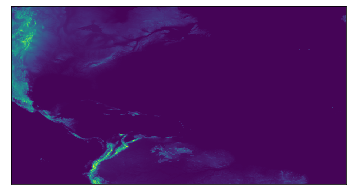

In [41]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(orog))

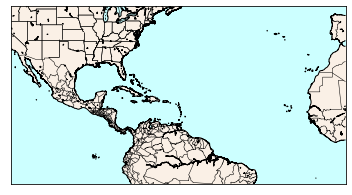

In [37]:

m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawlsmask(land_color='Linen', ocean_color='#CCFFFF') # can use HTML names or codes for colors
m.drawcounties() # you can even add counties (and other shapefiles!)

In [50]:
plt.figure(figsize=(18,12))

<Figure size 1296x864 with 0 Axes>

<Figure size 1296x864 with 0 Axes>

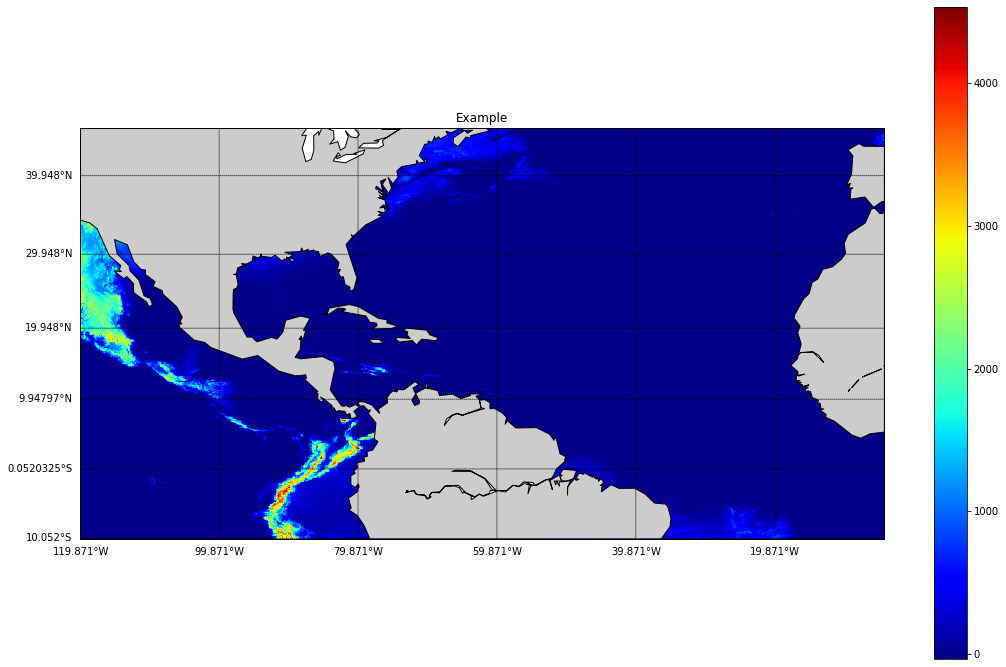

In [52]:

plt.figure(figsize=(18,12))
map=Basemap(projection='mill',lat_ts=10, \
  llcrnrlon=np.nanmin(lon),urcrnrlon=np.nanmax(lon), \
  llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
#Convert the lat/lon values to x/y projections.
lon, lat = np.meshgrid(lons1d, lats1d)
xi, yi = m(lon, lat)

#Next, plot the field using the fast pcolormesh routine and set the colormap to jet.
#cs = m.pcolormesh(xi,yi,orog,shading='flat', \
 # cmap=plt.cm.jet)

cs = m.pcolor(xi,yi,np.squeeze(orog), cmap=plt.cm.jet)
#Add a coastline and axis values.
map.drawcoastlines()
map.fillcontinents()
map.drawmapboundary()
map.drawparallels(np.arange(np.min(lats1d),np.max(lats1d),10.), \
  labels=[1,0,0,0])
map.drawmeridians(np.arange(np.min(lons1d),np.max(lons1d),20.), \
  labels=[0,0,0,1])
#Add a colorbar and title, and then show the plot.
colorbar(cs)
plt.title('Example')
plt.show()
